# Organize
1. Create grid of 12h
2. Add mean and last known

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ltm = pd.read_parquet("../Dataset/mimic-iv/from_pipeline/ltm_5000.parquet")

In [4]:
ltm.stay_id.isna().sum()

0

In [5]:
ltm

,stay_id,time,value,variable,raw_age,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
5177,mimic4-34155256,3 days 09:07:00,93.0,O2_pulseoxymetry_saturation,48.0,0.0,154.97,73.0000,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5178,mimic4-34155256,4 days 03:07:00,93.0,O2_pulseoxymetry_saturation,48.0,0.0,154.97,73.0000,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5179,mimic4-34155256,4 days 07:13:00,1.0,glasgow_coma_score_motor,48.0,0.0,154.97,73.0000,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5180,mimic4-34155256,4 days 09:07:00,100.0,O2_pulseoxymetry_saturation,48.0,0.0,154.97,73.0000,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
5181,mimic4-34155256,10 days 04:07:00,94.0,O2_pulseoxymetry_saturation,48.0,0.0,154.97,73.0000,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78385947,mimic4-31104880,8 days 04:19:00,55.0,noninvasive_diastolic_blood_pressure,58.0,0.0,162.78,60.9268,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385948,mimic4-31104880,0 days 11:17:00,54.0,noninvasive_diastolic_blood_pressure,58.0,0.0,162.78,60.9268,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385960,mimic4-31104880,6 days 05:19:00,91.0,noninvasive_systolic_blood_pressure,58.0,0.0,162.78,60.9268,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1
78385961,mimic4-31104880,11 days 02:20:00,78.0,noninvasive_systolic_blood_pressure,58.0,0.0,162.78,60.9268,Medical,Unknown,11 days 17:26:28.999999,2122-04-22 23:43:00,2122-05-04 17:09:29,11 days 00:17:00,1


In [6]:
ltm.loc[ltm.stay_id=="mimic4-34155256"].sort_values("time").head(5)

,stay_id,time,value,variable,raw_age,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
2275631,mimic4-34155256,0 days 00:07:00,36.388889,temperature,48.0,0.0,154.97,73.0,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
69861461,mimic4-34155256,0 days 00:18:00,61.000000,noninvasive_mean_blood_pressure,48.0,0.0,154.97,73.0,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
50361571,mimic4-34155256,0 days 00:18:00,47.000000,noninvasive_diastolic_blood_pressure,48.0,0.0,154.97,73.0,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
2276401,mimic4-34155256,0 days 00:18:00,109.000000,heart_rate,48.0,0.0,154.97,73.0,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1
69861957,mimic4-34155256,0 days 00:18:00,108.000000,noninvasive_systolic_blood_pressure,48.0,0.0,154.97,73.0,Medical,Emergency,10 days 20:49:44.999999,2129-03-23 16:53:00,2129-04-03 13:42:45,10 days 07:07:00,1


In [7]:
# Columns that do NOT change over time (baseline variables)
baseline_cols = [
    "stay_id", "raw_age", "sex", "raw_height", "raw_weight",
    "unit_type", "origin", "los", "intime", "outtime", "death_time_from_intime", "icu_mortality"
]

# Pivot: variables → columns, values → entries
ltm_wide = (
    ltm
    .pivot_table(
        index=["stay_id", "time"],   # one row per (stay_id, time)
        columns="variable",          # each variable becomes a new column
        values="value",              # values fill the new columns
        aggfunc="first"              # safe if no duplicates
    )
    .reset_index()
)

# Merge baseline columns back (they are constant per stay_id)
ltm_wide = ltm_wide.merge(
    ltm[baseline_cols].drop_duplicates("stay_id"),
    on="stay_id",
    how="left"
)


In [8]:
ltm_wide

,stay_id,time,FiO2,O2_arterial_saturation,O2_pulseoxymetry_saturation,PEEP,PTT,alanine_aminotransferase,albumin,alkaline_phosphatase,...,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 00:53:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,0 days 02:47:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,0 days 03:06:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30002548,0 days 03:46:17,100.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,1.0,177.9,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
4,mimic4-30002548,0 days 03:49:17,NaN,NaN,NaN,NaN,27.9,NaN,NaN,NaN,...,1.0,177.9,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792245,mimic4-39997955,4 days 13:56:58,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792246,mimic4-39997955,4 days 14:56:58,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792247,mimic4-39997955,4 days 15:56:58,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
792248,mimic4-39997955,4 days 16:56:58,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0


In [9]:
ltm_wide.stay_id.isna().sum()

0

In [10]:
ltm_wide.loc[ltm_wide.stay_id=="mimic4-30002548"].sort_values("time").head(5)

,stay_id,time,FiO2,O2_arterial_saturation,O2_pulseoxymetry_saturation,PEEP,PTT,alanine_aminotransferase,albumin,alkaline_phosphatase,...,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 00:53:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,0 days 02:47:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,0 days 03:06:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30002548,0 days 03:46:17,100.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
4,mimic4-30002548,0 days 03:49:17,NaN,NaN,NaN,NaN,27.9,NaN,NaN,NaN,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0


In [11]:
ltm_wide.columns

Index(['stay_id', 'time', 'FiO2', 'O2_arterial_saturation',
       'O2_pulseoxymetry_saturation', 'PEEP', 'PTT',
       'alanine_aminotransferase', 'albumin', 'alkaline_phosphatase',
       'aspartate_aminotransferase', 'bicarbonate', 'bilirubine',
       'blood_glucose', 'blood_urea_nitrogen', 'calcium', 'chloride',
       'creatinine', 'expiratory_tidal_volume', 'glasgow_coma_score_eye',
       'glasgow_coma_score_motor', 'glasgow_coma_score_verbal', 'heart_rate',
       'hemoglobin', 'invasive_diastolic_blood_pressure',
       'invasive_mean_blood_pressure', 'invasive_systolic_blood_pressure',
       'lactate', 'magnesium', 'noninvasive_diastolic_blood_pressure',
       'noninvasive_mean_blood_pressure',
       'noninvasive_systolic_blood_pressure', 'pH', 'paCO2', 'paO2',
       'phosphate', 'plateau_pressure', 'platelets', 'potassium',
       'respiratory_rate', 'respiratory_rate_setting', 'sodium', 'temperature',
       'tidal_volume_setting', 'urine_output', 'ventilator_mode',
  

In [12]:
ltm_wide.hemoglobin.describe()

count     31461.000000
mean        200.448364
std       13807.476562
min           0.000000
25%           8.200000
50%           9.400000
75%          11.000000
max      999999.000000
Name: hemoglobin, dtype: float64

# Replace sentinel values with NaN

# Combine GCS
# Choose ABP
# O2 saturation

In [13]:
# Combine GCS
ltm_wide["glasgow_coma_score"] = (
    ltm_wide["glasgow_coma_score_eye"]
    + ltm_wide["glasgow_coma_score_motor"]
    + ltm_wide["glasgow_coma_score_verbal"]
)

# Replace invalid sums with NaN if any component is missing
ltm_wide["glasgow_coma_score"] = (
    ltm_wide["glasgow_coma_score"]
    .where(
        ltm_wide[[
            "glasgow_coma_score_eye",
            "glasgow_coma_score_motor",
            "glasgow_coma_score_verbal"
        ]].notna().all(axis=1)
    )
)

#ltm_wide['glasgow_coma_score'] = ltm_wide['glasgow_coma_score'].fillna(15)

In [14]:
# Combine ABP
df = ltm_wide.copy()
# ---------------------------
# 1. Compute invasive MAP if SBP/DBP are present
# ---------------------------
df["MAP_art_calc"] = (
    df["invasive_systolic_blood_pressure"] +
    2 * df["invasive_diastolic_blood_pressure"]
) / 3

# Pick invasive_mean if exists, else computed invasive
df["MAP_invasive"] = df["invasive_mean_blood_pressure"].combine_first(df["MAP_art_calc"])


# ---------------------------
# 2. Compute non-invasive MAP if SBP/DBP are present
# ---------------------------
df["MAP_nibp_calc"] = (
    df["noninvasive_systolic_blood_pressure"] +
    2 * df["noninvasive_diastolic_blood_pressure"]
) / 3

# Pick noninvasive_mean if exists, else computed non-invasive
df["MAP_noninvasive"] = df["noninvasive_mean_blood_pressure"].combine_first(df["MAP_nibp_calc"])


# ---------------------------
# 3. Final clinically informed hierarchy
# ---------------------------
# Use invasive MAP when available, else non-invasive MAP
df["arterial_blood_pressure"] = df["MAP_invasive"].combine_first(df["MAP_noninvasive"])


# Optional: cleanup intermediate columns if you want
df.drop(columns=[
    "MAP_art_calc",
    "MAP_invasive",
    "MAP_nibp_calc",
    "MAP_noninvasive"
], inplace=True)

ltm_wide["arterial_blood_pressure"] = df["arterial_blood_pressure"].copy()


In [15]:
# O2 saturation
# Clinically correct hierarchy: SaO₂ (ABG) > SpO₂ (pulse ox)
ltm_wide["oxygen_saturation"] = ltm_wide["O2_arterial_saturation"] \
    .combine_first(ltm_wide["O2_pulseoxymetry_saturation"])


In [16]:
mean_vars = ['temperature',
             'heart_rate',
             'arterial_blood_pressure',
             'urine_output',
             'paCO2',
             'respiratory_rate',
             'oxygen_saturation',
             'paO2']
               
last_vars = ['bicarbonate',
               'PTT',
               'hemoglobin',
               'creatinine',
               'blood_urea_nitrogen',
               'lactate',
               'glasgow_coma_score',
               'FiO2',
               'ventilator_mode'
               ]
baseline = ["stay_id", "raw_age", "sex", "raw_height", "raw_weight", "unit_type", "origin", "los", "intime", "outtime", "death_time_from_intime", "icu_mortality"]

In [17]:
confounders = mean_vars + last_vars

In [18]:
all_vars = confounders + baseline + ["time"]
ltm_wide_confounders = ltm_wide[all_vars]

In [19]:
all_vars

['temperature',
 'heart_rate',
 'arterial_blood_pressure',
 'urine_output',
 'paCO2',
 'respiratory_rate',
 'oxygen_saturation',
 'paO2',
 'bicarbonate',
 'PTT',
 'hemoglobin',
 'creatinine',
 'blood_urea_nitrogen',
 'lactate',
 'glasgow_coma_score',
 'FiO2',
 'ventilator_mode',
 'stay_id',
 'raw_age',
 'sex',
 'raw_height',
 'raw_weight',
 'unit_type',
 'origin',
 'los',
 'intime',
 'outtime',
 'death_time_from_intime',
 'icu_mortality',
 'time']

In [20]:
ltm_wide_confounders.stay_id.isna().sum()

0

# Check t_adm, i.e., admission time/reference time. Ideally it should be 0 days 00:00:00. Correct?

In [21]:
ltm_wide_confounders_first_rows = (
    ltm_wide_confounders.sort_values(["stay_id", "time"])
       .groupby("stay_id", as_index=False)
       .first()
)


In [22]:
ltm_wide_confounders_first_rows

,stay_id,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,bicarbonate,...,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality,time
0,mimic4-30002548,36.944447,80.0,60.0,250.0,44.0,0.0,99.0,420.0,25.0,...,177.90,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0,0 days 00:53:17
1,mimic4-30003202,36.833336,111.0,61.0,30.0,NaN,25.0,100.0,NaN,25.0,...,160.01,59.2000,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0,0 days 00:57:59
2,mimic4-30003372,36.888893,106.0,77.0,25.0,NaN,17.0,97.0,NaN,21.0,...,NaN,135.0000,Surgical,Other,2 days 12:39:30.999999,2170-06-10 03:15:10,2170-06-12 15:54:41,NaT,0,0 days 00:00:50
3,mimic4-30006565,38.666668,101.0,93.0,75.0,43.0,21.0,94.0,102.0,21.0,...,180.17,74.0020,Medical,Emergency,3 days 07:48:12,2127-07-18 12:44:45,2127-07-21 20:32:57,NaT,0,0 days 01:15:15
4,mimic4-30007983,36.500000,60.0,89.0,200.0,46.0,10.0,100.0,70.0,35.0,...,182.94,88.8932,Medical,Emergency,1 days 17:28:20,2176-07-24 04:03:00,2176-07-25 21:31:20,NaT,0,0 days 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mimic4-39993298,36.833336,95.0,175.0,NaN,42.0,21.0,94.0,47.0,23.0,...,NaN,157.2000,Medical,Other,1 days 16:22:53,2189-08-01 23:57:00,2189-08-03 16:19:53,NaT,0,0 days 00:03:00
4996,mimic4-39993560,34.722225,134.0,88.0,500.0,29.0,13.0,100.0,166.0,14.0,...,NaN,60.0000,Trauma,Other,1 days 18:19:55,2184-12-02 20:45:32,2184-12-04 15:05:27,149 days 03:14:28,0,0 days 00:04:28
4997,mimic4-39996044,36.388889,105.0,80.0,225.0,47.0,23.0,100.0,104.0,26.0,...,NaN,66.4000,Medical,Emergency,7 days 00:32:29,2164-12-10 17:50:47,2164-12-17 18:23:16,75 days 06:09:13,0,0 days 01:52:13
4998,mimic4-39996123,36.500000,77.0,57.0,50.0,67.0,16.0,94.0,119.0,23.0,...,157.24,80.4942,Medical-Surgical,Emergency,3 days 13:52:52,2134-07-22 01:52:00,2134-07-25 15:44:52,NaT,0,0 days 00:36:00


<Axes: ylabel='Frequency'>

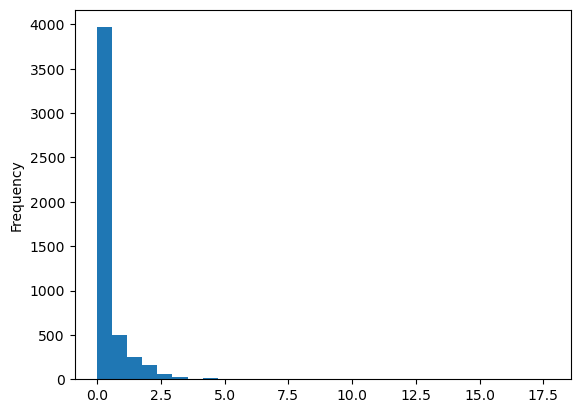

In [23]:
# Check distribution of first time point
ltm_wide_confounders_first_rows["time_hours"] = (
    ltm_wide_confounders_first_rows["time"].dt.total_seconds() / 3600
)
ltm_wide_confounders_first_rows["time_hours"].plot.hist(bins=30)



## Conclusion. Most data are recorded within 0 to 2 hours of admission. So, the first data point belongs to the bucket [0h, 12h]. i.e. data at 12th hour point.

## Remove stay_ids which do not have data for more than >=12h

In [24]:
# 12 hours in pandas Timedelta
MIN_HOURS = pd.Timedelta(hours=12)

# Compute maximum elapsed time per stay_id
max_time_per_stay = ltm_wide_confounders.groupby("stay_id")["time"].max()

# Identify which stay_ids have < 12h of follow-up
short_stays = max_time_per_stay[max_time_per_stay < MIN_HOURS].index

# Number of stay_ids dropped
n_dropped = len(short_stays)
print("Number of stay_ids dropped:", n_dropped)



Number of stay_ids dropped: 271


In [25]:
short_stays

Index(['mimic4-30024132', 'mimic4-30077305', 'mimic4-30087542',
       'mimic4-30089159', 'mimic4-30097370', 'mimic4-30099226',
       'mimic4-30130540', 'mimic4-30131075', 'mimic4-30151795',
       'mimic4-30223835',
       ...
       'mimic4-39723380', 'mimic4-39744326', 'mimic4-39747469',
       'mimic4-39779752', 'mimic4-39820610', 'mimic4-39850432',
       'mimic4-39912828', 'mimic4-39946275', 'mimic4-39979841',
       'mimic4-39982932'],
      dtype='object', name='stay_id', length=271)

In [26]:
ltm_wide_confounders.loc[ltm_wide_confounders.stay_id=="mimic4-39946275"]

,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,paO2,bicarbonate,PTT,...,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality,time
785952,NaN,76.0,NaN,NaN,NaN,32.0,96.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 01:30:53
785953,36.277782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 01:35:53
785954,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 01:44:53
785955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,39.299999,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 02:27:53
785956,NaN,77.0,82.0,NaN,NaN,23.0,98.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 02:30:53
785957,NaN,75.0,76.0,NaN,NaN,22.0,97.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 03:30:53
785958,NaN,73.0,76.0,NaN,NaN,21.0,96.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 04:30:53
785959,36.388889,74.0,76.0,NaN,NaN,26.0,NaN,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 05:30:53
785960,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 05:45:53
785961,NaN,79.0,78.0,NaN,NaN,26.0,97.0,NaN,NaN,NaN,...,NaN,68.7,Cardiac,Other,0 days 10:55:04,2187-02-02 06:29:07,2187-02-02 17:24:11,NaT,0,0 days 06:30:53


In [27]:
# Filter mimicdata to keep only stay_ids with >= 12h of follow-up
ltm_wide_confounders = ltm_wide_confounders[~ltm_wide_confounders["stay_id"].isin(short_stays)]

print("Number remaining:", ltm_wide_confounders['stay_id'].nunique())

Number remaining: 4729


# Debugging vent_mode and vent_mode_hours

In [28]:
ltm_wide_confounders.ventilator_mode.value_counts(dropna=False)

ventilator_mode
NaN     762357
14.0     10455
10.0      9598
9.0        983
22.0       832
31.0       673
41.0       599
29.0       395
27.0       255
17.0       219
21.0        93
28.0        87
12.0        72
36.0        67
11.0        65
5.0         61
13.0        55
16.0        54
38.0        53
2.0         46
42.0        26
8.0         23
25.0        18
35.0        15
19.0        10
7.0          7
26.0         6
4.0          5
6.0          4
20.0         3
18.0         3
30.0         2
15.0         2
23.0         1
33.0         1
Name: count, dtype: int64

## vent_mode map back to categorical

In [29]:
# Load vent_mode_map.json
with open("vent_mode_map.json", "r") as g:
    ventmode_map = json.load(g)
reverse_ventmode_map = {v: k for k, v in ventmode_map.items()}
ltm_wide_confounders["ventilator_mode"] = ltm_wide_confounders["ventilator_mode"].fillna(99)
ltm_wide_confounders["ventilator_mode"] = ltm_wide_confounders["ventilator_mode"].map(reverse_ventmode_map)

In [31]:
ltm_wide_confounders.ventilator_mode.value_counts(dropna=False)

ventilator_mode
unknown                 762357
CPAP/PSV                 10455
CMV/ASSIST/AutoFlow       9598
CMV/ASSIST                 983
MMV/PSV/AutoFlow           832
PSV/SBT                    673
Standby                    599
PRVC/AC                    395
PCV+Assist                 255
CPAP/PSV+ApnVol            219
MMV/PSV                     93
PRES/AC                     87
CPAP                        72
SIMV/PSV/AutoFlow           67
CMV/AutoFlow                65
APV (cmv)                   61
CPAP/PPS                    55
CPAP/PSV+ApnPres            54
SPONT                       53
APRV                        46
VOL/AC                      26
CMV                         23
PCV+                        18
SIMV/PSV                    15
MMV                         10
Apnea Ventilation            7
PCV+/PSV                     6
APRV/Biphasic+ApnVol         5
Ambient                      4
MMV/AutoFlow                 3
DuoPaP                       3
PRVC/SIMV              

In [32]:
# For one of the patients
ltm_wide_confounders.stay_id.unique()

array(['mimic4-30002548', 'mimic4-30003202', 'mimic4-30003372', ...,
       'mimic4-39996044', 'mimic4-39996123', 'mimic4-39997955'],
      dtype=object)

In [33]:
ltm_wide_confounders.loc[ltm_wide_confounders.ventilator_mode!="unknown"].stay_id.unique()

array(['mimic4-30006565', 'mimic4-30007983', 'mimic4-30009597', ...,
       'mimic4-39984228', 'mimic4-39987417', 'mimic4-39996123'],
      dtype=object)

In [34]:
ltm_wide_confounders.loc[ltm_wide_confounders.stay_id=="mimic4-39987417"][["time", "ventilator_mode"]]

,time,ventilator_mode
791115,0 days 00:57:29,CMV/ASSIST/AutoFlow
791116,0 days 01:03:29,unknown
791117,0 days 01:06:29,unknown
791118,0 days 01:09:29,unknown
791119,0 days 01:24:29,unknown
...,...,...
791260,1 days 14:57:29,CMV/ASSIST/AutoFlow
791261,1 days 15:45:29,unknown
791262,1 days 15:56:29,unknown
791263,1 days 15:57:29,unknown


In [35]:
ltm_wide_confounders.loc[ltm_wide_confounders.stay_id=="mimic4-39996123"][["time", "ventilator_mode"]].to_csv("bg_mimic4-39996123.csv")

# Gridding data for every 12h

In [36]:
df = ltm_wide_confounders.copy()

# Ensure correct dtype
df["time"] = pd.to_timedelta(df["time"])
df["los"]  = pd.to_timedelta(df["los"])

# --------------------------------------------------------------------
# Function to grid one stay_id
# --------------------------------------------------------------------
def process_stay(stay_df):
    stay_df = stay_df.sort_values("time")
    los = stay_df["los"].iloc[0]

    # LOS in hours
    total_hours = los.total_seconds() / 3600

    # Grid end points: 12h, 24h, 36h, ... up to ≥ LOS
    grid_ends_hours = np.arange(12, total_hours + 12, 12)
    grid_ends = pd.to_timedelta(grid_ends_hours, unit="h")

    rows = []

    for end in grid_ends:
        start = end - pd.Timedelta(hours=12)

        # Window: (start, end] except first includes [0, end]
        if start <= pd.Timedelta(0):
            window = stay_df[(stay_df["time"] >= pd.Timedelta(0)) &
                             (stay_df["time"] <= end)]
        else:
            window = stay_df[(stay_df["time"] > start) &
                             (stay_df["time"] <= end)]

        row = {
            "stay_id": stay_df["stay_id"].iloc[0],
            "grid_end": end,
        }

        # ----------------------------------------------------------
        # Compute vent_mode__hours_since_last__last_12h
        # Meaning: hours since vent mode was last RECORDED (ignore unknown)
        # ----------------------------------------------------------
        if len(window) > 0:
            # Extract only rows where vent mode is known
            v_known = window[
                window["ventilator_mode"].notna() &
                (window["ventilator_mode"] != "unknown")
            ][["time", "ventilator_mode"]]

            if len(v_known) > 0:
                # Take the LAST time vent mode was recorded
                last_recorded_time = v_known["time"].iloc[-1]

                # Compute hours since that time up to the end of the window
                hours_since = (end - last_recorded_time).total_seconds() / 3600.0

                # Clip to [0, 12]
                hours_since = min(max(hours_since, 0), 12)
            else:
                # No known vent mode recorded within window
                hours_since = np.nan
        else:
            hours_since = np.nan

        row["vent_mode__hours_since_last__last_12h"] = hours_since
        # ----------------------------------------------------------
        
        # Mean variables
        for vname in mean_vars:
            row[vname] = window[vname].mean() if len(window) else np.nan

        # Last variables
        #for vname in last_vars:
        #    row[vname] = window[vname].iloc[-1] if len(window) else np.nan



        # Last variables — ignore "unknown"
        for vname in last_vars:
            if len(window) == 0:
                row[vname] = np.nan
            else:
                # Drop unknowns
                w = window[window[vname] != "unknown"]

                if len(w) > 0:
                    # Last known (non-unknown) value
                    row[vname] = w[vname].iloc[-1]
                else:
                    # All unknown → return NaN
                    row[vname] = np.nan



        # Baseline variables
        for b in baseline:
            row[b] = stay_df[b].iloc[0]

        rows.append(row)

    return pd.DataFrame(rows)



# --------------------------------------------------------------------
# Apply to all stay_ids
# --------------------------------------------------------------------
ltm_grided = (
    df.groupby("stay_id", group_keys=False)
      .apply(process_stay)
      .reset_index(drop=True)
)


C:\Users\snsimha\AppData\Local\Temp\ipykernel_20204\1684453530.py:110: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(process_stay)


In [40]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-39987417"][["grid_end", "ventilator_mode", "vent_mode__hours_since_last__last_12h"]]

,grid_end,ventilator_mode,vent_mode__hours_since_last__last_12h
38445,0 days 12:00:00,CMV/ASSIST/AutoFlow,2.041944
38446,1 days 00:00:00,CMV/ASSIST/AutoFlow,1.041944
38447,1 days 12:00:00,CMV/ASSIST/AutoFlow,1.041944
38448,2 days 00:00:00,CMV/ASSIST/AutoFlow,9.041944


In [ ]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-39996123"][["grid_end", "ventilator_mode", "vent_mode__hours_since_last__last_12h"]]

KeyError: "['ventilator_mode'] not in index"

: 

In [42]:
ltm_grided.stay_id.isna().sum()

0

In [43]:
ltm_grided

,stay_id,grid_end,vent_mode__hours_since_last__last_12h,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,...,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 12:00:00,NaN,36.622223,79.230766,71.000000,225.000000,43.166668,13.384615,98.461540,...,1.0,177.90,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,1 days 00:00:00,NaN,36.944447,70.500000,79.571426,87.500000,NaN,18.250000,98.666664,...,1.0,177.90,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,1 days 12:00:00,NaN,37.333332,76.500000,87.750000,38.750000,NaN,21.000000,97.500000,...,1.0,177.90,88.3030,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
3,mimic4-30003202,0 days 12:00:00,NaN,37.208336,99.312500,52.571430,46.500000,NaN,18.466667,96.533333,...,1.0,160.01,59.2000,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0
4,mimic4-30003202,1 days 00:00:00,NaN,37.166668,91.400002,56.400002,95.000000,NaN,16.400000,93.599998,...,1.0,160.01,59.2000,Surgical,Emergency,0 days 16:56:08.999999,2188-07-03 20:38:01,2188-07-04 13:34:10,183 days 03:21:59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38494,mimic4-39997955,3 days 00:00:00,NaN,36.907406,69.083336,95.916664,230.000000,NaN,21.166666,97.166664,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38495,mimic4-39997955,3 days 12:00:00,NaN,36.777779,70.500000,89.833336,245.714279,NaN,18.166666,96.416664,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38496,mimic4-39997955,4 days 00:00:00,NaN,36.861115,80.000000,98.416664,209.375000,NaN,19.000000,96.833336,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0
38497,mimic4-39997955,4 days 12:00:00,NaN,36.629635,84.833336,94.333336,162.727280,NaN,17.333334,95.500000,...,1.0,NaN,94.5682,Surgical,Emergency,4 days 18:20:08,2160-10-26 19:03:02,2160-10-31 13:23:10,NaT,0


In [44]:
ltm_grided.columns

Index(['stay_id', 'grid_end', 'vent_mode__hours_since_last__last_12h',
       'temperature', 'heart_rate', 'arterial_blood_pressure', 'urine_output',
       'paCO2', 'respiratory_rate', 'oxygen_saturation', 'paO2', 'bicarbonate',
       'PTT', 'hemoglobin', 'creatinine', 'blood_urea_nitrogen', 'lactate',
       'glasgow_coma_score', 'FiO2', 'ventilator_mode', 'raw_age', 'sex',
       'raw_height', 'raw_weight', 'unit_type', 'origin', 'los', 'intime',
       'outtime', 'death_time_from_intime', 'icu_mortality'],
      dtype='object')

In [45]:
ltm_grided.vent_mode__hours_since_last__last_12h.describe()

count    7835.000000
mean        2.940152
std         2.628732
min         0.000000
25%         1.100000
50%         2.250000
75%         3.685556
max        11.990278
Name: vent_mode__hours_since_last__last_12h, dtype: float64

<Axes: ylabel='Frequency'>

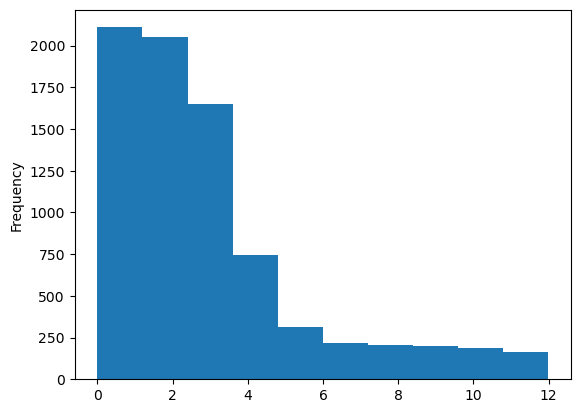

In [46]:
ltm_grided.vent_mode__hours_since_last__last_12h.plot.hist()

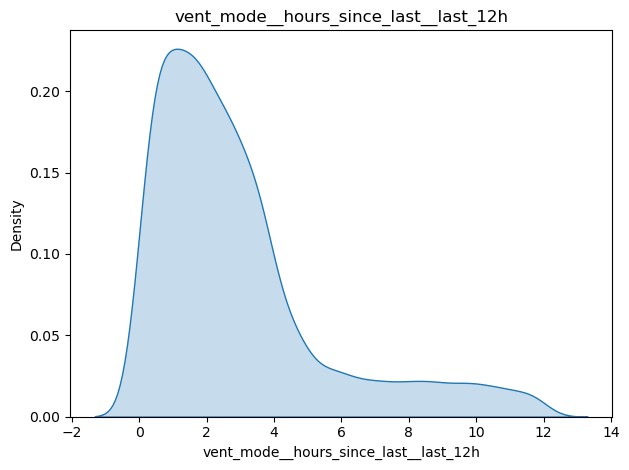

In [47]:
var = "vent_mode__hours_since_last__last_12h"
sns.kdeplot(data=ltm_grided, x=var, fill=True, bw_adjust=1)
plt.title(var)
plt.tight_layout()
plt.show()

In [48]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-30002548"]

,stay_id,grid_end,vent_mode__hours_since_last__last_12h,temperature,heart_rate,arterial_blood_pressure,urine_output,paCO2,respiratory_rate,oxygen_saturation,...,sex,raw_height,raw_weight,unit_type,origin,los,intime,outtime,death_time_from_intime,icu_mortality
0,mimic4-30002548,0 days 12:00:00,NaN,36.622223,79.230766,71.000000,225.00,43.166668,13.384615,98.461540,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
1,mimic4-30002548,1 days 00:00:00,NaN,36.944447,70.500000,79.571426,87.50,NaN,18.250000,98.666664,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0
2,mimic4-30002548,1 days 12:00:00,NaN,37.333332,76.500000,87.750000,38.75,NaN,21.000000,97.500000,...,1.0,177.9,88.303,Cardiac,Operating Room,1 days 05:36:48,2111-08-17 13:13:43,2111-08-18 18:50:31,NaT,0


In [49]:
ltm_grided.loc[ltm_grided.stay_id=="mimic4-30002548"].ventilator_mode

0    NaN
1    NaN
2    NaN
Name: ventilator_mode, dtype: object

In [50]:
ltm_grided.stay_id.nunique()

4729

## Renaming column name from those in raw data to the __mean__last_12 and __last__last_12h

In [51]:
# Load mappings.json
with open("mappings.json", "r") as f:
    mappings = json.load(f)

# Apply renaming
ltm_grided = ltm_grided.rename(columns=mappings)

In [52]:
ltm_grided.stay_id.nunique()

4729

In [53]:
ltm_grided["vent_mode__last__last_12h"].value_counts(dropna=False)

vent_mode__last__last_12h
NaN                     30664
CPAP/PSV                 3480
CMV/ASSIST/AutoFlow      2580
Standby                   436
PSV/SBT                   313
CMV/ASSIST                265
MMV/PSV/AutoFlow          223
PRVC/AC                   118
PCV+Assist                 72
CPAP/PSV+ApnVol            62
APV (cmv)                  34
SPONT                      30
CPAP                       29
MMV/PSV                    28
PRES/AC                    28
VOL/AC                     20
CMV/AutoFlow               18
CPAP/PSV+ApnPres           18
CPAP/PPS                   17
CMV                        16
APRV                       11
SIMV/PSV/AutoFlow           8
SIMV/PSV                    5
PCV+                        4
Ambient                     4
MMV                         4
Apnea Ventilation           3
PCV+/PSV                    2
CPAP/PSV+Apn TCPL           2
PRVC/SIMV                   1
P-CMV                       1
MMV/AutoFlow                1
APRV/Biphasic+

## Mortality within X days after discharge


In [54]:
# Ensure correct dtypes
ltm_grided["intime"]  = pd.to_datetime(ltm_grided["intime"], errors="coerce")
ltm_grided["outtime"] = pd.to_datetime(ltm_grided["outtime"], errors="coerce")

# death_time_from_intime must be timedelta
ltm_grided["death_time_from_intime"] = pd.to_timedelta(
    ltm_grided["death_time_from_intime"], errors="coerce"
)

# Absolute death time = intime + death offset
ltm_grided["death_abs_time"] = ltm_grided["intime"] + ltm_grided["death_time_from_intime"]

# 7-day post-ICU mortality (row level)
ltm_grided["mortality_after_discharge"] = (
    ltm_grided["death_abs_time"].notna()
    & (ltm_grided["death_abs_time"] > ltm_grided["outtime"])
    & (ltm_grided["death_abs_time"] <= ltm_grided["outtime"] + pd.Timedelta(days=7))
).astype(int)

In [55]:
#ratio of mortality
last_rows = ltm_grided.groupby("stay_id").tail(1)
(last_rows["mortality_after_discharge"] == 1).mean()

0.03594840346796363

## Check if "Mortality" is in-icu mortality

In [56]:
#ratio of icu mortality
(last_rows["icu_mortality"] == 1).mean()

0.11736096426305773

## Map to standard categories (invasive_controlled, invasive assisted etc)

In [57]:
ltm_grided["vent_mode__last__last_12h"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
38494    NaN
38495    NaN
38496    NaN
38497    NaN
38498    NaN
Name: vent_mode__last__last_12h, Length: 38499, dtype: object

In [58]:
# Mapping vent_mode__last__last_12h from raw categories → derived categories
vent_mode_map = {
    "SPONT": "invasive_assisted",
    "CMV/ASSIST/AutoFlow": "invasive_controlled",
    "PSV/SBT": "invasive_assisted",
    "CMV/ASSIST": "invasive_controlled",
    "invasive_assisted": "invasive_assisted",
    "APV (cmv)": "invasive_controlled",
    "invasive_controlled": "invasive_controlled",
    "CPAP/PSV+ApnVol": "invasive_assisted",
    "SIMV/PSV/AutoFlow": "invasive_controlled",
    "CMV/AutoFlow": "invasive_controlled",
    "Spontaneous (S)": "invasive_assisted",
    "PCV+Assist": "invasive_controlled",
    "(S) CMV": "invasive_controlled",
    "Not applicable": "cancelled",
    "MMV/PSV/AutoFlow": "invasive_assisted",
    "PCV+": "invasive_controlled",
    "MMV/PSV": "invasive_assisted",
    "niv_unknown": "niv_unknown",
    "CPAP/PSV+ApnPres": "invasive_assisted",
    "PRES/AC": "invasive_controlled",
    "APRV/Biphasic+ApnVol": "invasive_controlled",
    "SIMV/PSV": "invasive_controlled",
    "CMV": "invasive_controlled",
    "Spontaneous/Timed (S/T) (Back up)": "cancelled",
    "VOL/AC": "invasive_controlled",
    "PCV+/PSV": "invasive_controlled",
    "SIMV/PRES": "invasive_controlled",
    "Apnea Ventilation": "cancelled",
    "niv_assisted": "niv_assisted",
    "APV (simv)": "invasive_controlled",
    "SYNCHRON MASTER": "cancelled",
    "SIMV/VOL": "invasive_controlled",
    "PRVC/SIMV": "invasive_controlled",
    "APRV/Biphasic+ApnPress": "invasive_controlled",
    "MMV/AutoFlow": "invasive_assisted",
    "P-SIMV": "invasive_controlled",
    "Timed (T)": "cancelled",
    "CPAP/PSV+Apn TCPL": "invasive_assisted",
    "SYNCHRON SLAVE": "cancelled",
    "DuoPaP": "invasive_assisted",
    "nCPAP-PS": "niv_assisted",
    "Standby": "invasive_assisted"
}
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].map(vent_mode_map)

In [70]:
ltm_grided["vent_mode__last__last_12h"] = ltm_grided["vent_mode__last__last_12h"].fillna("unknown")

In [71]:
ltm_grided["vent_mode__last__last_12h"].value_counts(dropna=False)

vent_mode__last__last_12h
unknown                34328
invasive_controlled     3054
invasive_assisted       1114
cancelled                  3
Name: count, dtype: int64

## Check mim, max and distributions (density plot)

In [72]:
L_confounders = list(mappings.values()) + ["vent_mode__hours_since_last__last_12h"]

In [73]:
L_confounders

['bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__mean__last_12h',
 'lactate__last__last_12h',
 'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 'vent_mode__last__last_12h',
 'vent_mode__hours_since_last__last_12h']

In [74]:
L_to_clip = [
 'bicarbonate_arterial__last__last_12h',
 'activated_partial_thromboplastin_time__last__last_12h',
 'temperature__mean__last_12h',
 'hemoglobin__last__last_12h',
 'heart_rate__mean__last_12h',
 'arterial_blood_pressure_mean__mean__last_12h',
 'creatinine__last__last_12h',
 'ureum__last__last_12h',
 'fluid_out_urine__mean__last_12h',
 'lactate__last__last_12h',
 #'glasgow_coma_scale_total__last__last_12h',
 'pco2_arterial__mean__last_12h',
 'respiratory_rate_measured__mean__last_12h',
 'o2_saturation__mean__last_12h',
 'o2_flow__last__last_12h',
 'po2_arterial__mean__last_12h',
 #'vent_mode__last__last_12h',
 #'vent_mode__hours_since_last__last_12h'
 ]

In [75]:
ltm_grided.hemoglobin__last__last_12h.describe()

count       928.000000
mean       1087.192134
std       32826.259744
min           5.000000
25%           8.100000
50%           9.300000
75%          10.825000
max      999999.000000
Name: hemoglobin__last__last_12h, dtype: float64

In [76]:
def mask_sentinels(df, vars_to_clean, lower=0, upper=1e4):
    """
    Returns a copy of df where any value in vars_to_clean below 'lower'
    or above 'upper' is set to NaN.
    """
    df_clean = df.copy()

    df_clean[vars_to_clean] = df_clean[vars_to_clean].mask(
        (df_clean[vars_to_clean] < lower) | (df_clean[vars_to_clean] > upper),
        np.nan
    )

    return df_clean
ltm_grided_clean = mask_sentinels(ltm_grided, L_to_clip)


In [77]:
ltm_grided_clean.hemoglobin__last__last_12h.describe()

count    927.000000
mean       9.617368
std        2.007790
min        5.000000
25%        8.100000
50%        9.300000
75%       10.800000
max       18.400000
Name: hemoglobin__last__last_12h, dtype: float64

In [78]:
def clip_mean_iqr(df, vars_to_clip, k=4):
    """
    Two-sided robust clipping: mean ± k*IQR for each variable.
    k=4 by default.
    """
    df = df.copy()
    
    for col in vars_to_clip:
        # compute summary statistics
        mean = df[col].mean()
        q1   = df[col].quantile(0.25)
        q3   = df[col].quantile(0.75)
        iqr  = q3 - q1
        
        lower = mean - k * iqr
        upper = mean + k * iqr
        
        df[col] = df[col].clip(lower=lower, upper=upper)
    
    return df
ltm_grided_clipped = clip_mean_iqr(ltm_grided_clean, L_to_clip, 4)


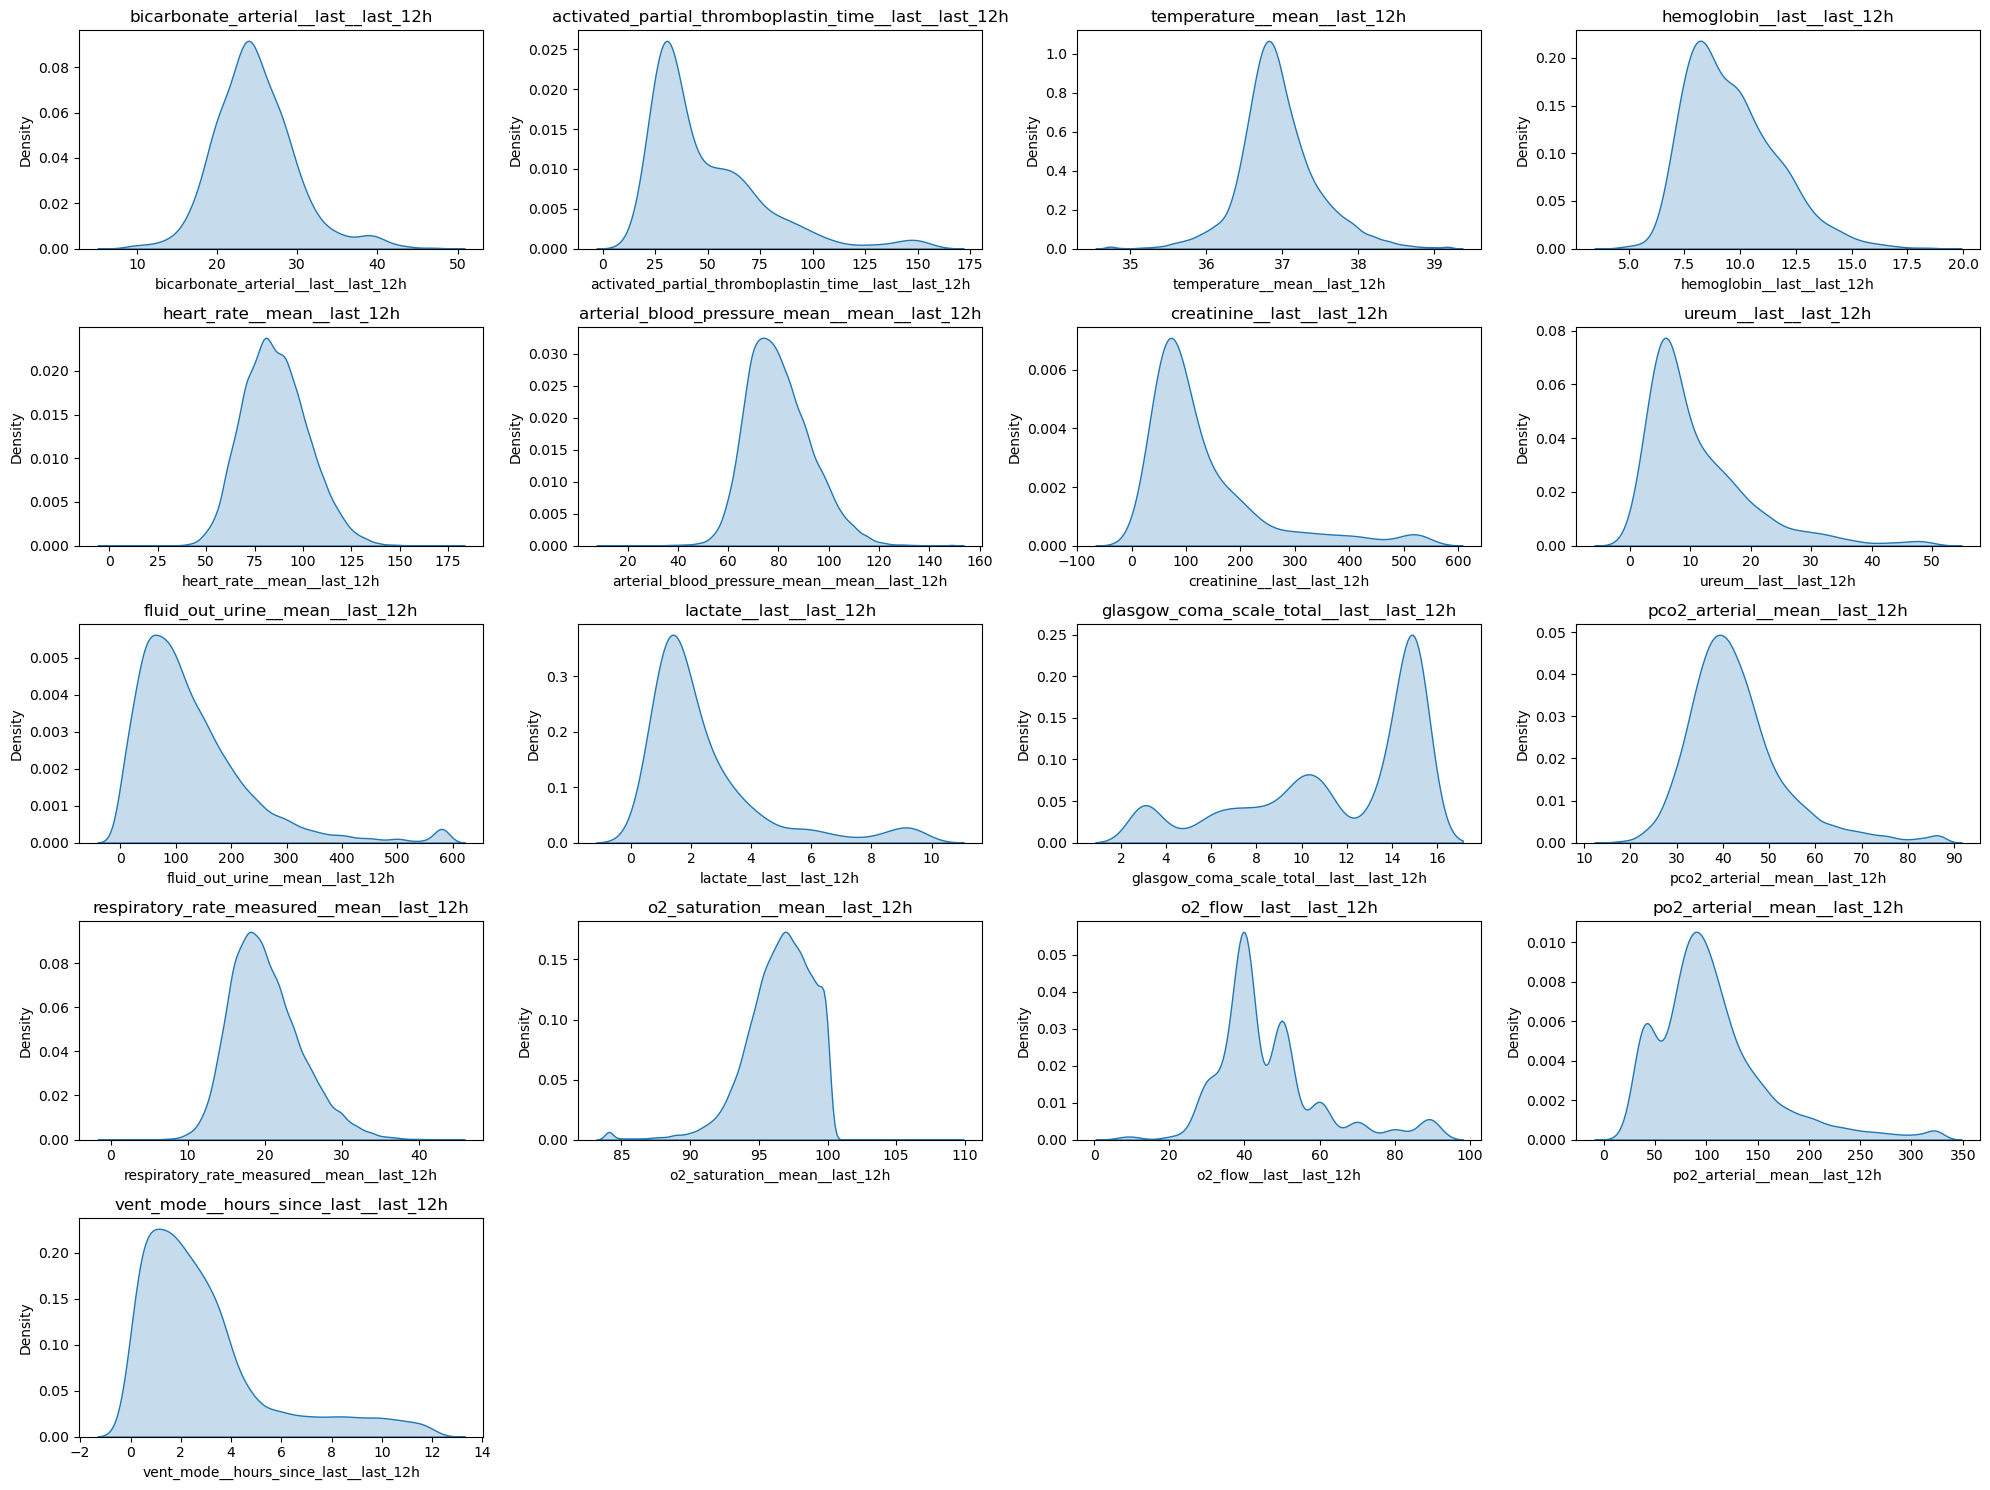

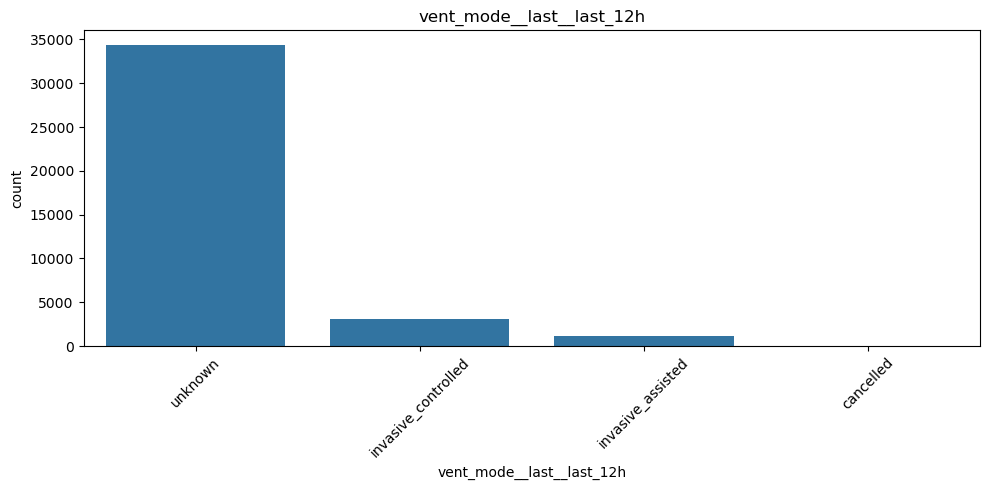

In [79]:
# Split categorical vs numerical
cat_var  = "vent_mode__last__last_12h"
num_vars = [v for v in L_confounders if v != cat_var]

# === NUMERIC VARIABLES: Density plots ===
n = len(num_vars)
cols = 4
rows = (n + cols - 1) // cols

plt.figure(figsize=(20, rows * 3))

for i, var in enumerate(num_vars, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=ltm_grided_clipped, x=var, fill=True, bw_adjust=1)
    plt.title(var)
    plt.tight_layout()

plt.show()

# === CATEGORICAL VARIABLE: Countplot ===
plt.figure(figsize=(10, 5))
sns.countplot(data=ltm_grided_clipped, x=cat_var)
plt.xticks(rotation=45)
plt.title(cat_var)
plt.tight_layout()
plt.show()


In [80]:
ltm_grided_clipped.to_parquet("../Dataset/mimic-iv/from_pipeline/ltm_grided_cleaned_5000.parquet")